In [2]:
# Import the required Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

In [3]:
# Loading the Dataset

df = pd.read_csv("/content/drive/MyDrive/Luminar_Projects/HR_Analytics/train.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
# Removing Unwanted column

df.drop(["employee_id"],axis=1,inplace=True)

## Basic EDA

In [5]:
# Checking the Unique values in Target variable

df.is_promoted.unique()

array([0, 1])

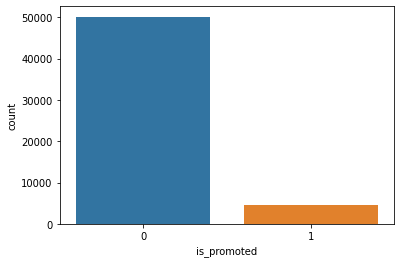

In [6]:
# plotting the Target variable

sns.countplot(x="is_promoted",data=df)
plt.show()

In [7]:
# Checking the value counts in Target Variable

df.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [8]:
# Shape of the dataset

df.shape

(54808, 13)

In [9]:
# Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [10]:
# Identify the Missing Values

df.isna().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
# Describe the Numerical data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


In [12]:
# Describe the Categorical data

df.describe(include='O').T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


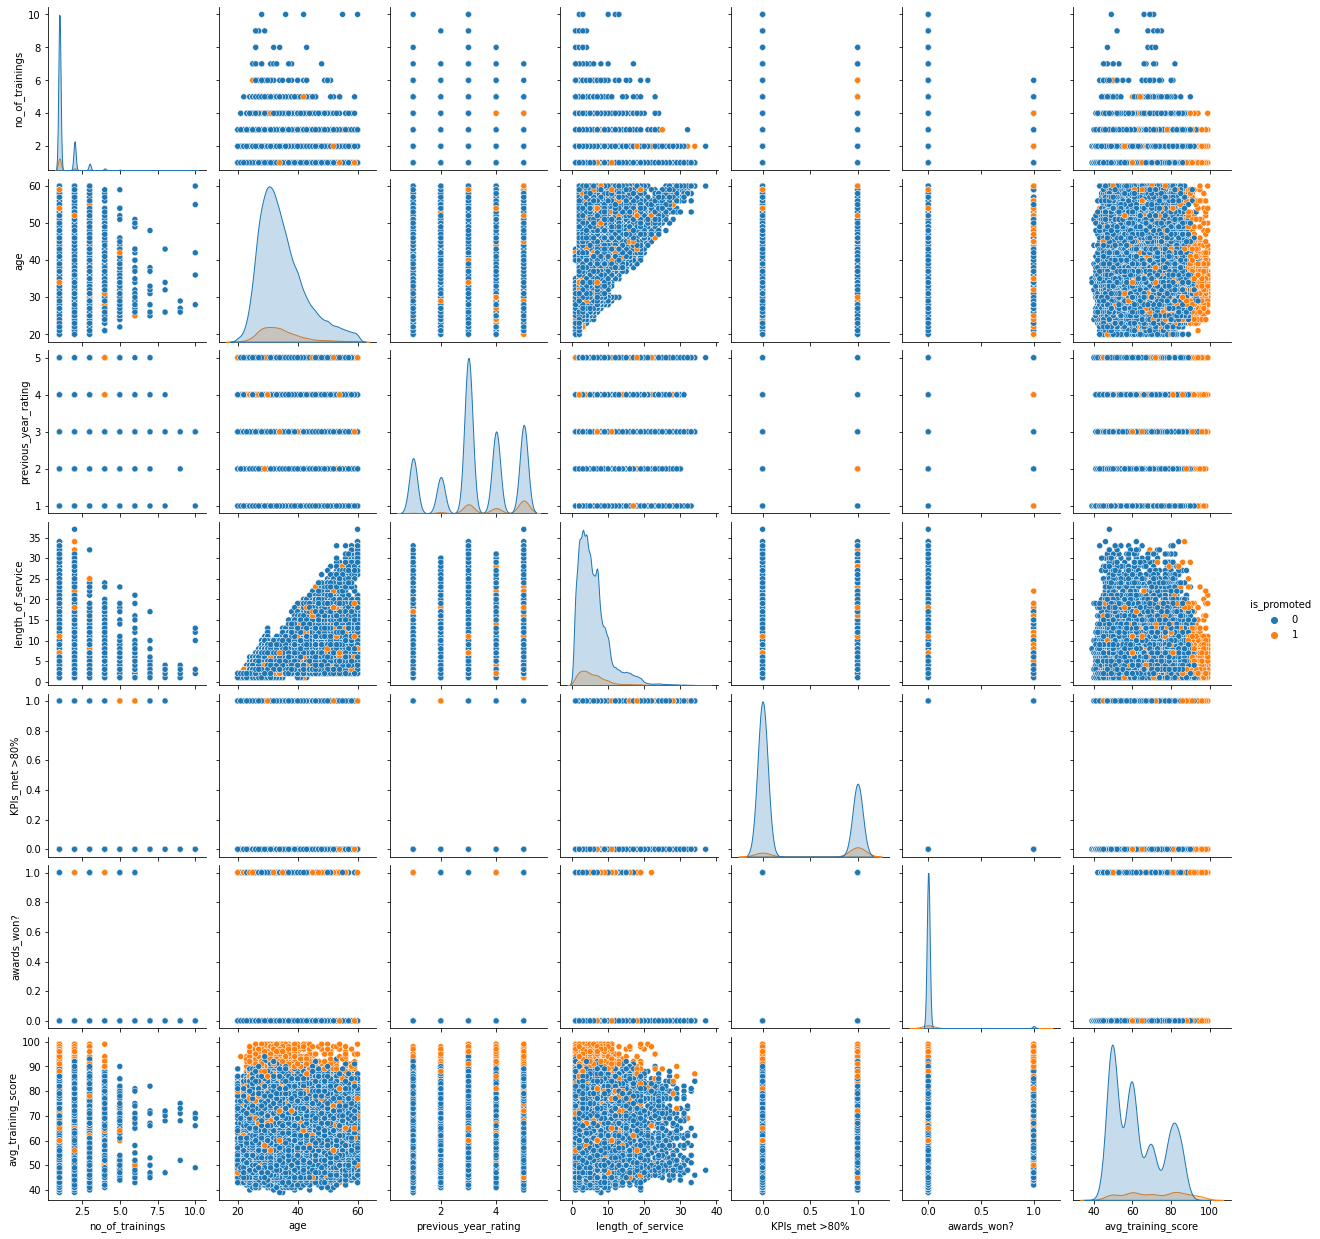

In [13]:
# Pairplot using sns

sns.pairplot(df,hue='is_promoted')

In [14]:
# Checking for duplicate values

df[df.duplicated()].count()

department              118
region                  118
education               107
gender                  118
recruitment_channel     118
no_of_trainings         118
age                     118
previous_year_rating     56
length_of_service       118
KPIs_met >80%           118
awards_won?             118
avg_training_score      118
is_promoted             118
dtype: int64

In [15]:
# Finding columns with numerical data

numericalColumns = df.select_dtypes(include=np.number).columns
numericalColumns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [16]:
# Finding columns with objective data

objectColumns = df.select_dtypes(include=object).columns
objectColumns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [17]:
# Finding discrete columns and continuous columns from numerical columns

discreteCols=[]
continuousCols=[]

for column in numericalColumns:
    if df[column].nunique()<=20:
        discreteCols.append(column)
    else:
        continuousCols.append(column)


In [18]:
discreteCols

['no_of_trainings',
 'previous_year_rating',
 'KPIs_met >80%',
 'awards_won?',
 'is_promoted']

In [19]:
continuousCols

['age', 'length_of_service', 'avg_training_score']

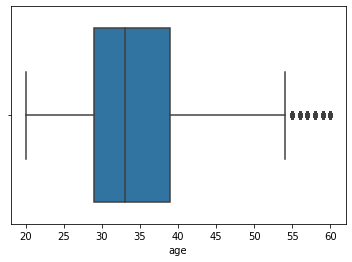

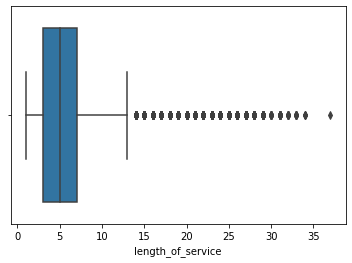

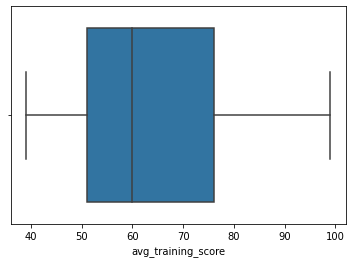

In [21]:
# Checking for Outlier values by plotting

for column in continuousCols:
    sns.boxplot(column,data=df)
    plt.show()

## Dropping Duplicate Rows

In [22]:
df.drop_duplicates(inplace=True)

## Missing Value Treatment

In [23]:
df['education'].fillna(df['education'].mode()[0],inplace=True)
df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0],inplace=True)

## Outlier Treatment

In [24]:
for column in continuousCols:
    upper_lim=df[column].mean() + df[column].std() *3
    lower_lim=df[column].mean() - df[column].std() *3

    df.loc[(df[column] > upper_lim),column] = upper_lim
    df.loc[(df[column] < lower_lim),column] = lower_lim


## Categorical Encoding

In [25]:
# Using Label Encoding

label_Department = LabelEncoder()
label_Region = LabelEncoder()

df["department"]=label_Department.fit_transform(df["department"])
df["region"]=label_Region.fit_transform(df["region"])

In [44]:
import joblib 
joblib.dump(label_Department,'/content/drive/MyDrive/Luminar_Projects/HR_Analytics/label_Department.pkl')
joblib.dump(label_Region,'/content/drive/MyDrive/Luminar_Projects/HR_Analytics/label_Region.pkl')

['/content/drive/MyDrive/Luminar_Projects/HR_Analytics/label_Region.pkl']

In [26]:
# Using Mapping Technique

Education = {"Master's & above":1,"Bachelor's":2,"Below Secondary":3}
Recruitment = {"sourcing":1,"referred":2,"other":3}
Gender = {"f":0,"m":1}

df['education']=df['education'].map(Education)
df['recruitment_channel']=df['recruitment_channel'].map(Recruitment)
df['gender']=df['gender'].map(Gender)

## Correlation

In [47]:
# Correlation on Dataset based on Target Variable

df.corr()['is_promoted']

department              0.000227
region                  0.008752
education              -0.027825
gender                 -0.010985
recruitment_channel    -0.002409
no_of_trainings        -0.024978
age                    -0.017557
previous_year_rating    0.153191
length_of_service      -0.009979
KPIs_met >80%           0.221490
awards_won?             0.195882
avg_training_score      0.181012
is_promoted             1.000000
Name: is_promoted, dtype: float64

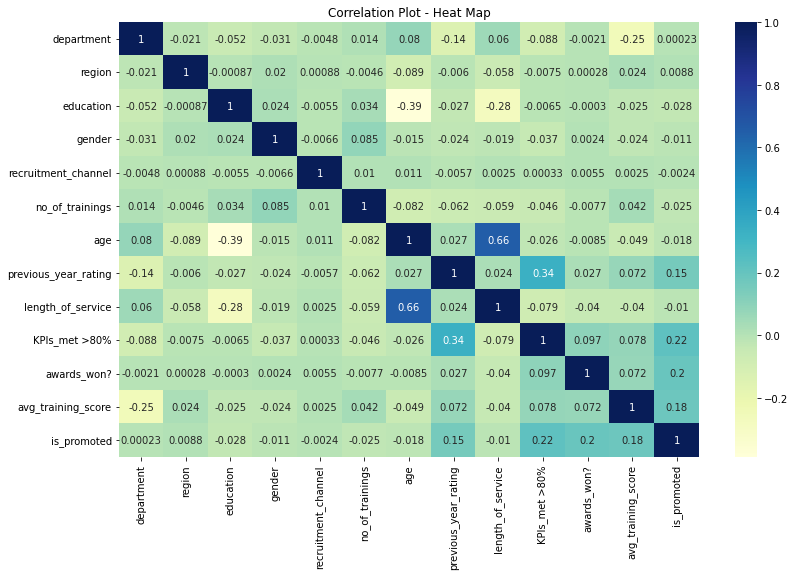

In [51]:
# Correlation Using Heat Map in Input Dataset

plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.title('Correlation Plot - Heat Map')
plt.show()

## Train Test Split 

In [27]:
X = df.drop('is_promoted',axis=1)
y = df['is_promoted']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Scale Down

In [28]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test) 

In [43]:
import joblib 
joblib.dump(scale,'/content/drive/MyDrive/Luminar_Projects/HR_Analytics/scale.pkl')

['/content/drive/MyDrive/Luminar_Projects/HR_Analytics/scale.pkl']

## Apply All Classification Algorithms

In [29]:
# Voting Classifier

lr_clf = LogisticRegression()
df_clf= DecisionTreeClassifier()
rf_clf= RandomForestClassifier()
adboost_clf= AdaBoostClassifier()
grad_clf=GradientBoostingClassifier()
svc_clf=SVC()
xgb_clf = XGBClassifier()

voting = VotingClassifier( estimators=[('Logistic_Regression',lr_clf),('Decision_Tree_Classifier',df_clf),('Random_Forest_Classifier',rf_clf),
                            ('AdaBoost_Classifier',adboost_clf),('Gradient_Boosting_Classifier',grad_clf),('SVC',svc_clf),('XGB_Classifier',xgb_clf)], voting= 'hard')

voting.fit(X_train_scaled,y_train)

VotingClassifier(estimators=[('Logistic_Regression', LogisticRegression()),
                             ('Decision_Tree_Classifier',
                              DecisionTreeClassifier()),
                             ('Random_Forest_Classifier',
                              RandomForestClassifier()),
                             ('AdaBoost_Classifier', AdaBoostClassifier()),
                             ('Gradient_Boosting_Classifier',
                              GradientBoostingClassifier()),
                             ('SVC', SVC()),
                             ('XGB_Classifier', XGBClassifier())])

In [30]:
voting_pred = voting.predict(X_test_scaled)

In [31]:
print(voting.score(X_train_scaled,y_train))
print(accuracy_score(y_test,voting_pred))

0.9370216545202832
0.9317364539525812


In [33]:
# Applying all Classification Algorithms to find the best model

for clf in (lr_clf,df_clf,rf_clf,adboost_clf,grad_clf,svc_clf,xgb_clf):
  clf.fit(X_train_scaled,y_train)
  y_pred = clf.predict(X_test_scaled)
  print(clf.__class__.__name__,clf.score(X_train_scaled,y_train))
  print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

  print("============================================")

LogisticRegression 0.9172217433325497
LogisticRegression 0.9166209544706527
DecisionTreeClassifier 0.9998432724708095
DecisionTreeClassifier 0.892667763759371
RandomForestClassifier 0.9998432724708095
RandomForestClassifier 0.9334430426037666
AdaBoostClassifier 0.9221325392471854
AdaBoostClassifier 0.9236301578594502
GradientBoostingClassifier 0.9368910482459577
GradientBoostingClassifier 0.9356372280124338
SVC 0.9238565420682809
SVC 0.9208264765039312
XGBClassifier 0.9354543792283782
XGBClassifier 0.9334430426037666


## Hyperparameter Tuning

In [34]:
lr_clf = LogisticRegression()
df_clf= DecisionTreeClassifier()
rf_clf= RandomForestClassifier()
adboost_clf= AdaBoostClassifier()
grad_clf=GradientBoostingClassifier()
svc_clf=SVC()
xgb_clf = XGBClassifier()

clf_list=[lr_clf,df_clf,rf_clf,adboost_clf,grad_clf,svc_clf]

grid_params_lr= [{'penalty':['l1','l2'],'solver':['saga']}]

grid_params_df =[{'criterion':["gini","entropy"], 'splitter':['best','random'],'max_depth':[3,4,5],'min_samples_split':[2,3,4],'max_features':["auto","sqrt","log2"]}]

grid_params_rf=[{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt','auto'], 'criterion': ['entropy', 'gini'],'max_depth': [2, 3, 5, 10]}]

grid_params_adboost=[{'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1],}]

grid_params_grad=[{'loss':['deviance', 'exponential'],'learning_rate':[1,7,9],'criterion':['friedman_mse','squared_error']}]

grid_params_svc=[{'kernel':['linear','poly','rbf'],'degree':[3,4,5]}]





clf_params=[grid_params_lr,grid_params_df,grid_params_rf,grid_params_adboost,grid_params_grad,grid_params_svc]

In [37]:
for clf,clf_param in zip(clf_list,clf_params):
  print(f"The Classifier is {clf} and its hyper params are {clf_param}")

  grid_clf = GridSearchCV(estimator=clf,param_grid=clf_param,scoring="accuracy",cv=10)
  grid_clf.fit(X_train_scaled,y_train)
  
  print(f"The Train accuracy for the {clf} is {grid_clf.score(X_train_scaled,y_train)}")

  print(f"The Test accuracy for the {clf} is {grid_clf.score(X_test_scaled,y_test)}")

  print(f"The Best param for the {clf} is {grid_clf.best_params_}")
  print("====================\n")

The Classifier is LogisticRegression() and its hyper params are [{'penalty': ['l1', 'l2'], 'solver': ['saga']}]
The Train accuracy for the LogisticRegression() is 0.9172217433325497
The Test accuracy for the LogisticRegression() is 0.9166209544706527
The Best param for the LogisticRegression() is {'penalty': 'l1', 'solver': 'saga'}

The Classifier is DecisionTreeClassifier() and its hyper params are [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2']}]
The Train accuracy for the DecisionTreeClassifier() is 0.9250319985372097
The Test accuracy for the DecisionTreeClassifier() is 0.9228378131285427
The Best param for the DecisionTreeClassifier() is {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 4, 'splitter': 'best'}

The Classifier is RandomForestClassifier() and its hyper params are [{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sq

In [38]:
# Making the best model - Gradient Boost

gradient_clf = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=1, loss='exponential')
gradient_clf.fit(X_train_scaled,y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential')

In [42]:
# Pickle File

import joblib 
joblib.dump(gradient_clf,'/content/drive/MyDrive/Luminar_Projects/HR_Analytics/model.pkl')

['/content/drive/MyDrive/Luminar_Projects/HR_Analytics/model.pkl']